In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


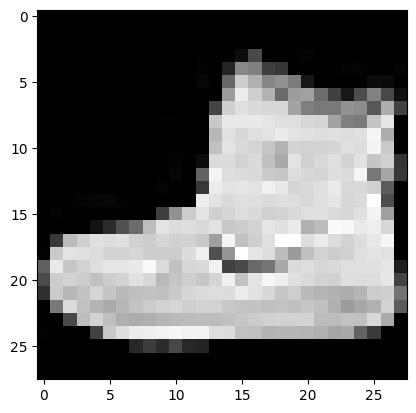

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[0], cmap='grey')

In [ ]:
x_train,x_test = x_train/255.0, x_test/255.0

In [ ]:
print('X_train shape:', x_train.shape)

X_train shape: (60000, 28, 28)


In [ ]:
#os dados são 2D (P&B)
#precisamos transformar ele em 3D, adicionando uma camada de cor de tamanho 1

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
#numero de classes

k = len(set(y_train))
print('Numero de classes:', k)

Numero de classes: 10


# **Modelo**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(x_train[0].shape),
    tf.keras.layers.Conv2D(32, (3,3), strides=2, activation = 'relu'),
    tf.keras.layers.Conv2D(64, (3,3), strides=2, activation = 'relu'),
    tf.keras.layers.Conv2D(128, (3,3), strides=2, activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(k, activation='softmax')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7922 - loss: 0.5642 - val_accuracy: 0.8531 - val_loss: 0.3879
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8579 - loss: 0.3785 - val_accuracy: 0.8629 - val_loss: 0.3585
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8752 - loss: 0.3272 - val_accuracy: 0.8719 - val_loss: 0.3392
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8904 - loss: 0.2886 - val_accuracy: 0.8837 - val_loss: 0.3105
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9021 - loss: 0.2618 - val_accuracy: 0.8931 - val_loss: 0.2944
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9082 - loss: 0.2431 - val_accuracy: 0.8935 - val_loss: 0.2971
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9152 - loss: 0.2248 - val_accuracy: 0.8915 - val_loss: 0.2939
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9205 - loss: 0.21

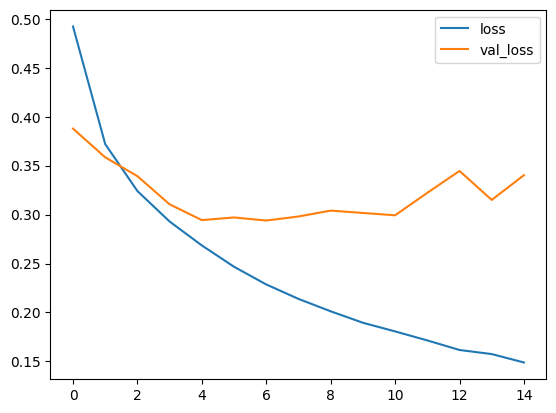

In [ ]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

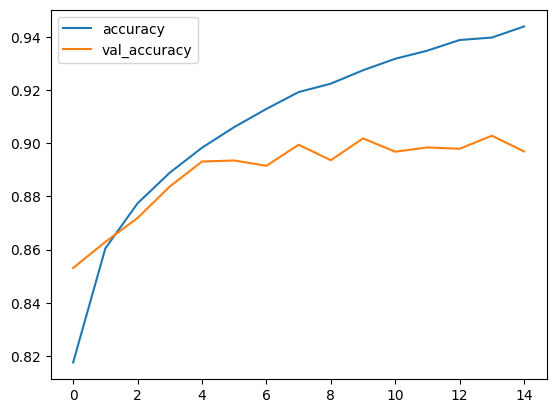

In [ ]:
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# **Predictions**

In [ ]:
import numpy as np

P = model.predict(x_test)
P = np.round(P).flatten()
print(P)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print('Acurácia: ', model.evaluate(x_test, y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8967 - loss: 0.3568
Acurácia:  [0.34024304151535034, 0.8968999981880188]


# **Matriz de confusão**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion matrix, without normalization
[[872   0  29  12   2   3  77   0   5   0]
 [  3 975   2  12   4   0   4   0   0   0]
 [ 13   1 903   6  42   0  34   0   1   0]
 [ 17   5  32 886  34   1  22   0   3   0]
 [  0   0  88  20 834   0  55   0   3   0]
 [  0   0   0   0   0 979   0  13   0   8]
 [134   0 105  23 108   0 620   0  10   0]
 [  0   0   0   0   0  14   0 951   0  35]
 [  2   0   5   0   5   3   5   0 979   1]
 [  2   0   0   0   0   5   0  23   0 970]]


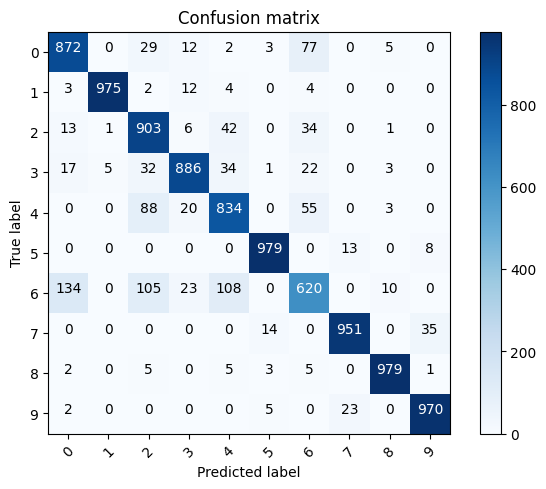

In [ ]:
#Plot confusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix'):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split('\n')

Text(0.5, 1.0, 'True label: 2 Predicted: 0')

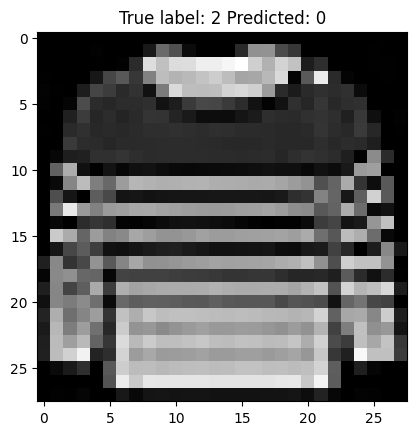

In [ ]:
#Show misdisclassified samples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))